In [1]:
#import library pandas dan matplotlib#

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#load csv pilrek dari github#

In [5]:
url = 'https://github.com/eueung/pilrek/raw/master/pilrek.csv'
df  = pd.read_csv(url)

In [6]:
df.tail()

,Timestamp,Kategori Anda,Kategori Umur Anda,CaRek Pilihan,Alasan Memilih CaRek,Harapan Anda
971,10/4/2019 15:38:56,Alumni,> 40 th,I Nyoman Pugeg Aryantha (SITH),"Emansipasi, kesetaraan dan kebhinekaan",Sesekali Rektor ITB orang Bali
972,10/7/2019 9:04:03,Mahasiswa,< 25 th,Edy Tri Baskoro (FMIPA-MA),Alumni SMPP Jombang,Dapat menjalankan amanah kepemimpinan ITB
973,10/8/2019 8:52:14,Dosen,25 - 40 th,Ary Setiaji Prihatmanto (STEI),Kapabilitas ybs utk meningkatkan ranking ITB,NaN
974,10/8/2019 11:45:04,Alumni,25 - 40 th,Ary Setiaji Prihatmanto (STEI),Akhlak dan budi pekerti,NaN
975,10/14/2019 13:50:34,Alumni,< 25 th,Gusti Ayu Putri Saptawati S (STEI),Sesuai dengan kriteria kekinian (Rektor 4.0),Jangan marah karena saya gocek dari jadi ca do...


In [7]:
#slicing ke kategori anda, visualisasi distribusi suara#

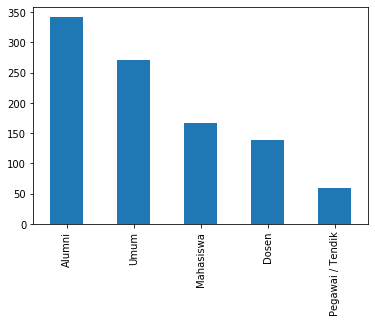

In [8]:
df['Kategori Anda'].value_counts().plot(kind='bar')

In [9]:
df['Kategori Anda'].value_counts()

Alumni              342
Umum                270
Mahasiswa           166
Dosen               138
Pegawai / Tendik     60
Name: Kategori Anda, dtype: int64

In [10]:
#slicing ke data mahasiswa#

In [11]:
mhs = df[df['Kategori Anda']=='Mahasiswa']

In [12]:
mhs.tail()

,Timestamp,Kategori Anda,Kategori Umur Anda,CaRek Pilihan,Alasan Memilih CaRek,Harapan Anda
892,9/13/2019 10:11:18,Mahasiswa,25 - 40 th,I Nyoman Pugeg Aryantha (SITH),Kapabilitas ybs utk memajukan riset dan indust...,Semoga yang terbaik yang terpilih
906,9/13/2019 16:13:01,Mahasiswa,< 25 th,Acep Purqon (FMIPA-FI),Kecerdasan dan keberanian utk kemajuan ITB,semoga dengan terpilih nya Acep ITB bisa menja...
956,9/19/2019 22:22:42,Mahasiswa,< 25 th,Miming Miharja (SAPPK-PL),Akhlak dan budi pekerti,"Siapapun rektornya, semoga ITB kembali menjadi..."
957,9/20/2019 7:17:43,Mahasiswa,< 25 th,Acep Purqon (FMIPA-FI),Kapabilitas ybs utk memajukan riset dan indust...,NaN
972,10/7/2019 9:04:03,Mahasiswa,< 25 th,Edy Tri Baskoro (FMIPA-MA),Alumni SMPP Jombang,Dapat menjalankan amanah kepemimpinan ITB


In [13]:
#spedifikasi fakultas dari carek#

In [14]:
STEI  = len(mhs[mhs['CaRek Pilihan'].str.contains("STEI")])
FTI   = len(mhs[mhs['CaRek Pilihan'].str.contains("FTI")])
SAPPK = len(mhs[mhs['CaRek Pilihan'].str.contains("SAPPK")])
SBM   = len(mhs[mhs['CaRek Pilihan'].str.contains("SBM")])
FMIPA = len(mhs[mhs['CaRek Pilihan'].str.contains("FMIPA")])
FTSL  = len(mhs[mhs['CaRek Pilihan'].str.contains("FTSL")])
FITB  = len(mhs[mhs['CaRek Pilihan'].str.contains("FITB")])
FTMD  = len(mhs[mhs['CaRek Pilihan'].str.contains("FTMD")])
SITH  = len(mhs[mhs['CaRek Pilihan'].str.contains("SITH")])
FSRD  = len(mhs[mhs['CaRek Pilihan'].str.contains("FSRD")])
CEO   = len(mhs[mhs['CaRek Pilihan'].str.contains("CEO")])
SF    = len(mhs[mhs['CaRek Pilihan'].str.contains("SF")])
DIREKTUR = len(mhs[mhs['CaRek Pilihan'].str.contains("DIREKTUR")])

In [15]:
#pembuatan dataframe berisi jumlah suara pada tiap fakultas#

In [16]:
fk = pd.DataFrame(columns=['fakultas','pemilih'], data = [['STEI',STEI],['FTI',FTI],['SAPPK',SAPPK],['SBM',SBM],['FMIPA',FMIPA],['FTSL',FTSL],['FITB',FITB],['FTMD',FTMD],['SITH',SITH],['FSRD',FSRD],['CEO',CEO],['SF',SF],['DIREKTUR',DIREKTUR]])

In [17]:
fk = fk.sort_values(by='pemilih', ascending =True).reset_index(drop=True)

In [18]:
fk

,fakultas,pemilih
0,FITB,0
1,FSRD,0
2,CEO,0
3,SF,0
4,DIREKTUR,0
5,SBM,1
6,SAPPK,2
7,FTMD,3
8,FTI,4
9,FTSL,10


In [20]:
#visualisasi distribusi suara tiap fakultas#

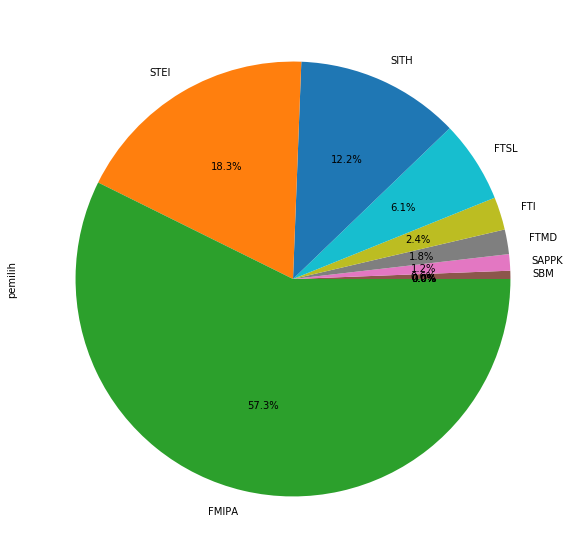

In [21]:
ax = fk['pemilih'].plot(kind='pie',autopct='%1.1f%%', labels=fk['fakultas'], figsize=(10,10))

In [22]:
#slicing ke fakultas dengan jumlah suara terbanyak = FMIPA#

In [23]:
fmp = mhs[mhs['CaRek Pilihan'].str.contains("FMIPA")]

In [24]:
fmp.reset_index(drop=True)

,Timestamp,Kategori Anda,Kategori Umur Anda,CaRek Pilihan,Alasan Memilih CaRek,Harapan Anda
0,9/1/2019 14:01:54,Mahasiswa,< 25 th,Acep Purqon (FMIPA-FI),Tipe yg futuristik dan outside-the-box yg bisa...,ITB yang lebih baik bersama Pa Acep
1,9/1/2019 14:02:17,Mahasiswa,< 25 th,Acep Purqon (FMIPA-FI),Kecerdasan dan keberanian utk kemajuan ITB,NaN
2,9/1/2019 14:05:53,Mahasiswa,25 - 40 th,Acep Purqon (FMIPA-FI),Kecerdasan dan keberanian utk kemajuan ITB,Semoga dengan bekal track record dan pengalama...
3,9/1/2019 14:09:00,Mahasiswa,25 - 40 th,Acep Purqon (FMIPA-FI),Tipe yg futuristik dan outside-the-box yg bisa...,ITB lebih unggul dengan adab yang baik dan ilm...
4,9/1/2019 14:17:34,Mahasiswa,< 25 th,Acep Purqon (FMIPA-FI),Tipe yg futuristik dan outside-the-box yg bisa...,Semoga rektor yang terpilih dapat memiliki sem...
5,9/1/2019 14:20:54,Mahasiswa,25 - 40 th,Acep Purqon (FMIPA-FI),Mendatangkan dana riset dan kerjasama eksterna...,NaN
6,9/1/2019 14:22:04,Mahasiswa,25 - 40 th,Acep Purqon (FMIPA-FI),Muda dan berenergi,Itb lebih maju lagi
7,9/1/2019 14:23:10,Mahasiswa,< 25 th,Acep Purqon (FMIPA-FI),Tipe yg futuristik dan outside-the-box yg bisa...,NaN
8,9/1/2019 14:31:55,Mahasiswa,25 - 40 th,Acep Purqon (FMIPA-FI),Karakter kepemimpinan dan leadership,Free asrama sangkuriang itb and better service...
9,9/1/2019 14:34:43,Mahasiswa,< 25 th,Edy Tri Baskoro (FMIPA-MA),Keberhasilan dan prestasi,Semoga sukses ke depannya ITB


In [25]:
#plot alasan memilih carek dari FMIPA#

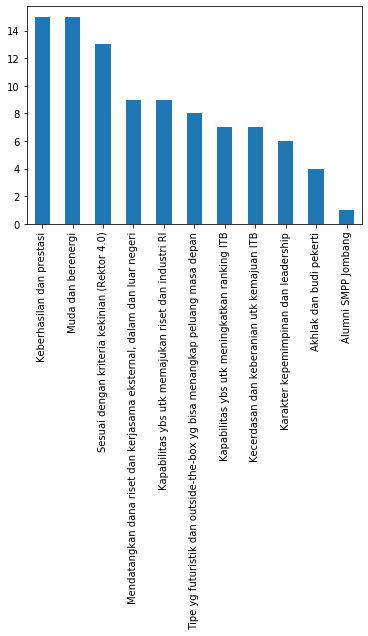

In [26]:
fmp['Alasan Memilih CaRek'].value_counts().plot(kind='bar')

In [27]:
#plot perolehan suara carek yang berasal dari FMIPA#

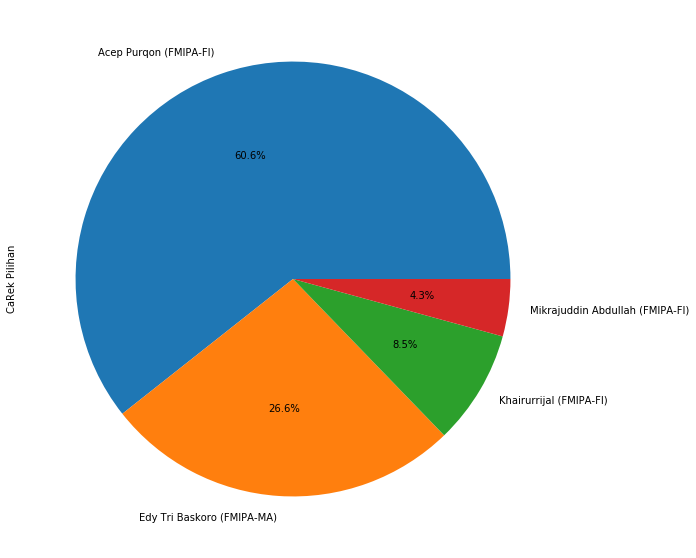

In [28]:
fmp['CaRek Pilihan'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10,10))